In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## A. Color Conversion

In [2]:
img_png = cv2.imread('./Lenna.png',)
img_png.shape 

(512, 512, 3)

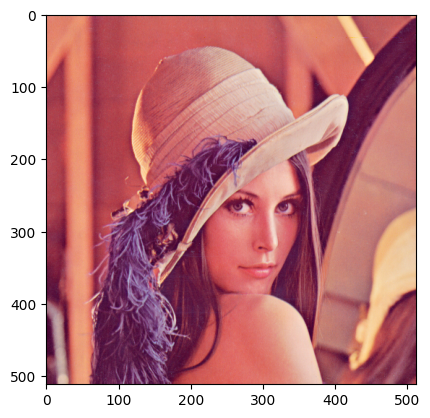

In [3]:
img = cv2.cvtColor(img_png, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### 1. RGB-2-HSV 

In [4]:
def RGB_2_HSV(img_unscaled):
    img = img_unscaled/255
    img_hsv = img.copy()
    
    H = np.zeros((img.shape[0],img.shape[1]))
    S = np.zeros((img.shape[0],img.shape[1]))
    V = np.zeros((img.shape[0],img.shape[1]))
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            #V
            V[i,j] = np.max(img[i,j])
            
            #S
            S[i,j] = (V[i,j]-np.min(img[i,j]))/(V[i,j]) if V[i,j] != 0 else 0

            #H
            index = np.argmax(img[i,j])
            R = img[i,j][0]
            G = img[i,j][1]
            B = img[i,j][2]
            if index == 0:
                H[i,j] = (60*(G-B))/(V[i,j]-min(R,G,B))
            elif index == 1:
                H[i,j] = 120+(((60*(B-R)))/(V[i,j]-min(R,G,B)))
            elif index == 2:
                H[i,j] = 240+(((60*(R-G)))/(V[i,j]-min(R,G,B)))
            elif index == 0 & index == 1 & index == 2:
                H[i,j] = 0
                
            if H[i,j] < 0:
                H[i,j] = H[i,j]+360
                
    print("H-Range:",H.min(),H.max())
    print("S-Range:",S.min(),S.max())
    print("V-Range:",V.min(),V.max())

    V = V*255
    S = S*255
    H = H/2
    
    img_hsv[:,:,0] = H
    img_hsv[:,:,1] = S
    img_hsv[:,:,2] = V
    
    img_hsv = np.round(img_hsv)
    img_hsv = img_hsv.astype('uint8')
    return img_hsv
    
    #return V

H-Range: 0.0 359.5804195804196
S-Range: 0.01877934272300476 0.9646017699115044
V-Range: 0.23137254901960785 1.0


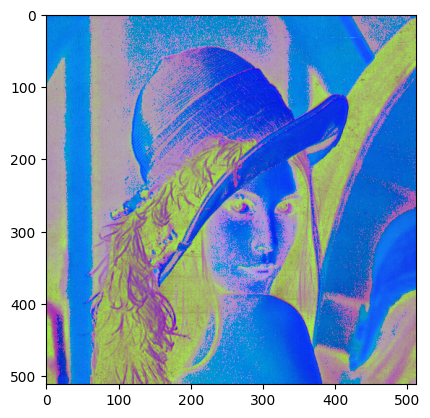

In [5]:
img_hsv = RGB_2_HSV(img)
plt.imshow(img_hsv)

In [6]:
cv2.imwrite('hvs_image_1.png',cv2.cvtColor(img_hsv, cv2.COLOR_BGR2RGB))

True

### 2. RGB-2-HSV 

In [7]:
def RGB_2_HSV_2(img):

    img_hsv = img.copy()
    
    H = np.zeros((img.shape[0],img.shape[1]))
    S = np.zeros((img.shape[0],img.shape[1]))
    I = np.zeros((img.shape[0],img.shape[1]))
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            R = img[i,j][0]
            G = img[i,j][1]
            B = img[i,j][2]
            
            #I
            I[i,j] = (R+G+B)/3
            
            #S
            S[i,j] = 1 - (min(R,G,B)/I[i,j])
            
            #H
            num = 0.5*((R-G)+(R-B))
            denom = np.sqrt((R-G)*(R-G) + (R-B)*(G-B))
            
            if denom > 0:
                theta = np.arccos(num/denom)
            
            if B <= G:
                H[i,j] = theta
            else:
                H[i,j] = 360-theta
    
    img_hsv[:,:,0] = H
    img_hsv[:,:,1] = S
    img_hsv[:,:,2] = I
    
    img_hsv = np.round(img_hsv)
    img_hsv = img_hsv.astype('uint8')
    return img_hsv
    
    #return V

/var/folders/g6/s8f0t0ys2rx1j7n5nfjtcp680000gn/T/ipykernel_14911/2572686477.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
  I[i,j] = (R+G+B)/3
/var/folders/g6/s8f0t0ys2rx1j7n5nfjtcp680000gn/T/ipykernel_14911/2572686477.py:24: RuntimeWarning: overflow encountered in ubyte_scalars
  denom = np.sqrt((R-G)*(R-G) + (R-B)*(G-B))
/var/folders/g6/s8f0t0ys2rx1j7n5nfjtcp680000gn/T/ipykernel_14911/2572686477.py:27: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(num/denom)
/var/folders/g6/s8f0t0ys2rx1j7n5nfjtcp680000gn/T/ipykernel_14911/2572686477.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  S[i,j] = 1 - (min(R,G,B)/I[i,j])
/var/folders/g6/s8f0t0ys2rx1j7n5nfjtcp680000gn/T/ipykernel_14911/2572686477.py:23: RuntimeWarning: overflow encountered in ubyte_scalars
  num = 0.5*((R-G)+(R-B))


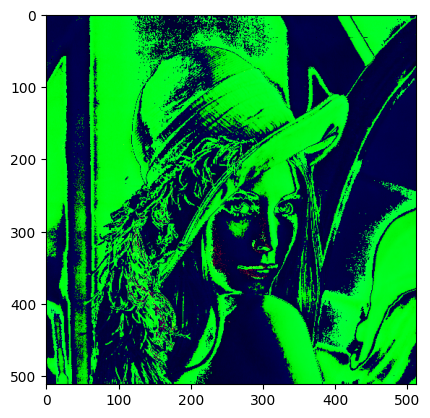

In [8]:
img_hsv = RGB_2_HSV_2(img)
plt.imshow(img_hsv)

In [9]:
cv2.imwrite('hvs_image_2.png',cv2.cvtColor(img_hsv, cv2.COLOR_RGB2BGR))

True

### 3. RGB-2-CMYK

In [10]:
def RGB_2_CMYK(img):
    
    img_cmyk = np.zeros((img.shape[0],img.shape[1],4))
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    
    C = 1 - R
    M = 1 - G
    Y = 1 - B
    K = np.zeros((img.shape[0],img.shape[1]))

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            c = C[i,j]
            m = M[i,j]
            y = Y[i,j]
            
            K[i,j] = min(c,m,y)
            C[i,j] = (c - K[i,j])/(1 - K[i,j])
            M[i,j] = (m - K[i,j])/(1 - K[i,j])
            Y[i,j] = (y - K[i,j])/(1 - K[i,j])
            
    img_cmyk[:,:,0] = C
    img_cmyk[:,:,1] = M
    img_cmyk[:,:,2] = Y
    img_cmyk[:,:,3] = K
    
    img_cmyk = np.round(img_cmyk)
    img_cmyk = img_cmyk.astype('uint8')
    return img_cmyk

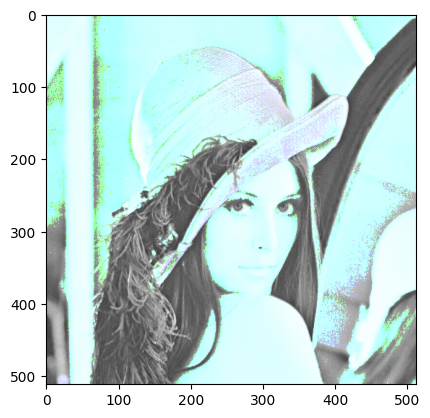

In [11]:
img_cmyk = RGB_2_CMYK(img)
plt.imshow(img_cmyk)

In [12]:
x = cv2.cvtColor(img_cmyk, cv2.COLOR_RGB2BGR)
cv2.imwrite('cmyk_image.png',x)

True

### 4. RGB-2-LAB

In [13]:
def RGB_2_LAB(img):
    
    img_LAB = np.zeros((img.shape))
    m = np.array([[0.412453, 0.35758, 0.180423],
                      [0.212671, 0.71516, 0.072169],
                      [0.019334, 0.119193, 0.950227]])
    
    X_n = 0.950456
    Z_n = 1.088754
    delta = 128
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            R = img[i,j,0]
            G = img[i,j,1]
            B = img[i,j,2]
            
            RGB = np.array([R,G,B])
            XYZ = np.matmul(m, RGB)
            
            X = XYZ[0]
            Y = XYZ[1]
            Z = XYZ[2]
            
            X = X/X_n
            Z = Z/Z_n
            
            L = 0
            if Y > 0.008856:
                L = (116 * np.power(Y,1/3)) - 16
            else:
                L = 903.3 * Y
               
            f_X = 0
            if X > 0.008856:
                f_X = np.power(X,1/3)
            else:
                f_X = 7.787*X + (16/116)
               
            f_Y = 0
            if Y > 0.008856:
                f_Y = np.power(Y,1/3)
            else:
                f_Y = 7.787*Y + (16/116)
                
            f_Z = 0
            if Z > 0.008856:
                f_Z = np.power(Z,1/3)
            else:
                f_Z = 7.787*Z + (16/116)
                
            
            a = 500 * (f_X - f_Y) + delta
            b = 200 * (f_Y - f_Z) + delta
            
            
            L = (L*255)/100
            a = a + 128
            b = b + 128
            
            img_LAB[i,j,0] = L
            img_LAB[i,j,1] = a
            img_LAB[i,j,2] = b
    
    img_LAB = np.round(img_LAB)
    img_LAB = img_LAB.astype('uint8')
    
    return img_LAB

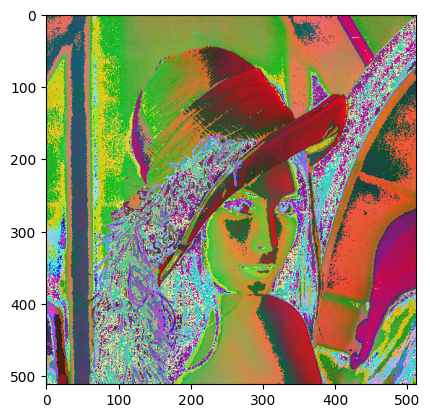

In [14]:
img_cmyk = RGB_2_LAB(img)
plt.imshow(img_cmyk)

In [15]:
x = cv2.cvtColor(img_cmyk, cv2.COLOR_RGB2BGR)
cv2.imwrite('lab_image.png',x)

True

## B. Image Filtering

In [16]:
gray_img = cv2.imread('./Noisy_image.png',cv2.IMREAD_GRAYSCALE)
gray_img.shape

(213, 204)

In [17]:
gray_img.size

43452

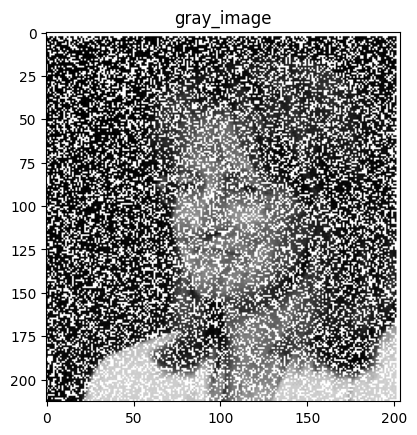

In [18]:
plt.title('gray_image')
plt.imshow(gray_img,cmap='gray')

### 1. Convolution Filter

In [19]:
scaling_factor = 1/9
conv_filter_unscaled = np.array([[1, 1, 1],
                                [1, 1, 1],
                                [1, 1, 1]
                            ])
conv_filter =  scaling_factor * conv_filter_unscaled
conv_filter = conv_filter.astype('float32')
conv_filter

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

In [20]:
def convolute(gray_img):
    gray_img = gray_img.astype('float')
    conv_img = np.zeros((gray_img.shape))
    temp = np.pad(gray_img, (1,1), 'constant')        
    for i in range(0,gray_img.shape[0]):
        for j in range(0,gray_img.shape[1]):
            local_img = temp[i:i+3,j:j+3]
            local_img = np.fliplr(local_img)
            local_img = np.flipud(local_img)
            conv_img[i,j] = np.sum(np.multiply(local_img,conv_filter))
            conv_img[i,j] = np.clip(conv_img[i,j], 0, 255)
    conv_img = conv_img.astype('uint8')
    return conv_img

True

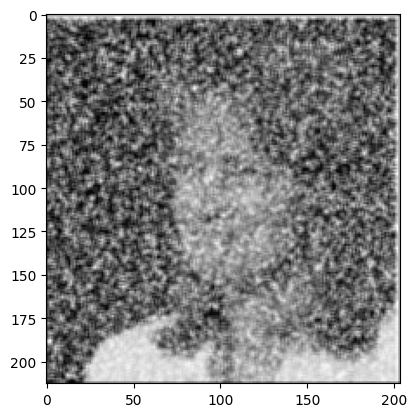

In [21]:
x = convolute(gray_img)
plt.imshow(x,cmap='gray')
cv2.imwrite('convolved_image.png',x)

### 2. Average Filter

In [22]:
scaling_factor = 1/9
avg_filter_unscaled = np.array([[1, 1, 1],
                                [1, 1, 1],
                                [1, 1, 1]
                            ])
avg_filter =  scaling_factor * avg_filter_unscaled
avg_filter

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [23]:
def avg_filter(gray_img):
    avg_img = np.zeros(gray_img.shape)
    temp = np.pad(gray_img, (1,1), 'constant')
    for i in range(0,gray_img.shape[0]):
        for j in range(0,gray_img.shape[1]):
            local_img = temp[i:i+3,j:j+3]
            avg_img[i,j] = np.mean(local_img)
    avg_img = np.clip(avg_img, 0, 255)
    avg_img = avg_img.astype('uint8')
    return avg_img

True

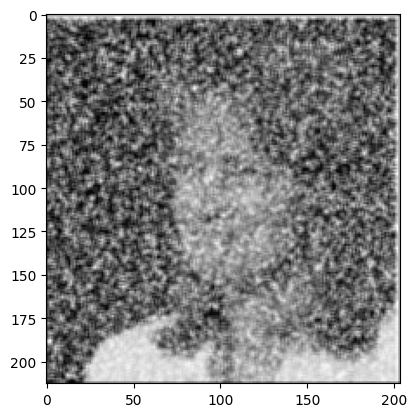

In [24]:
x = avg_filter(gray_img)
plt.imshow(x,cmap='gray')
cv2.imwrite('average_image.png',x)

### 3. Gaussian Filter

In [25]:
scaling_factor = 1/16
g_filter = np.array([[1, 2, 1],
                                [2, 4, 2],
                                [1, 2, 1]
                            ])
g_filter =  scaling_factor * g_filter
g_filter = g_filter.astype('float32')
flipped_g_filter = np.flip(g_filter)
flipped_g_filter

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]], dtype=float32)

In [26]:
def gaussian_filter(gray_img):
    
    scaling_factor = 1/16
    g_filter = np.array([[1, 2, 1],
                         [2, 4, 2],
                         [1, 2, 1]
                        ])
    g_filter =  scaling_factor * g_filter
    g_filter = g_filter.astype('float32')
    flipped_g_filter = np.flip(g_filter)
    
    gaussian_img = np.zeros((gray_img.shape))
    padded_gray_img = np.pad(gray_img, (1,1), 'constant')    
    height,width = gray_img.shape
    for i in range(height): #height
        for j in range(width): #width
            local_img = padded_gray_img[i:i+3,j:j+3]
            #print(flipped_g_filter.shape,local_img.shape)
            gaussian_img[i,j] = np.sum(np.multiply(flipped_g_filter,local_img))
            gaussian_img[i,j] = np.clip(gaussian_img[i,j], 0, 255)
    gaussian_img = gaussian_img.astype('uint8')
    return gaussian_img

True

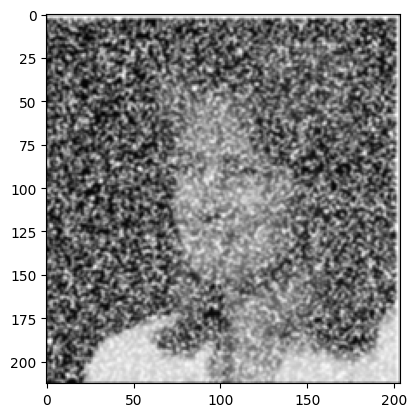

In [27]:
x = gaussian_filter(gray_img)
plt.imshow(x,cmap='gray')
cv2.imwrite('gaussian_image.png',x)

### 4. Median Filter

In [28]:
def median_filter(gray_img):
    median_img = np.zeros(gray_img.shape)
    temp = np.pad(gray_img, (1,1), 'constant')
    for i in range(0,gray_img.shape[0]):
        for j in range(0,gray_img.shape[1]):
            local_img = temp[i:i+3,j:j+3]
            arr = local_img.flatten()
            arr = np.sort(arr)
            median_img[i,j] = arr[4]#np.median(arr)
    median_img = np.clip(median_img, 0, 255)
    median_img = median_img.astype('uint8')
    return median_img

True

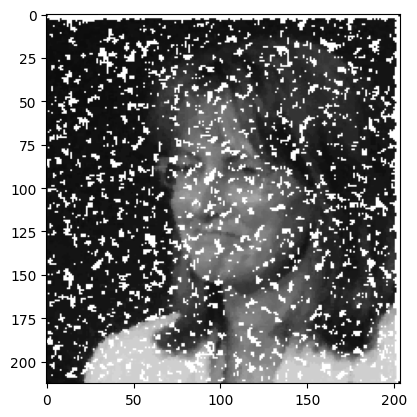

In [29]:
x = median_filter(gray_img)
plt.imshow(x,cmap='gray')
cv2.imwrite('median_image.png',x)

### 5. Increase Brightness, Contrast

(320, 512)

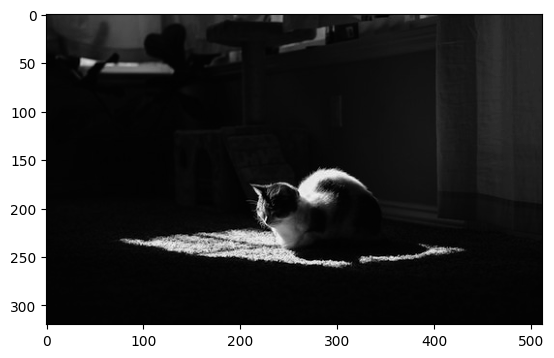

In [30]:
img_unexposed = cv2.imread('./Uexposed.png')
img_unexposed = np.mean(img_unexposed,axis=2)
plt.imshow(img_unexposed,cmap='gray')
img_unexposed.shape

In [31]:
def increase_contrast_brightness(img):
    brightness = 100
    contrast = 100
    image_bc = img_unexposed * (contrast/127+1) - contrast + brightness
    image_bc = np.clip(image_bc, 0, 255)
    image_bc = np.uint8(image_bc)
    return image_bc

True

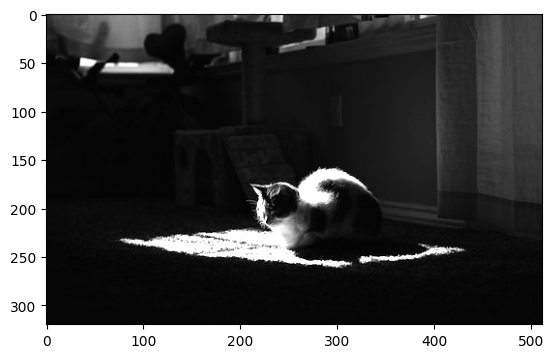

In [32]:
x = increase_contrast_brightness(img_unexposed)
plt.imshow(x,cmap='gray')
cv2.imwrite('adjusted_image.png',x)

## C. Fourier Gaussian

In [33]:
gray_img = cv2.imread('./Noisy_image.png',cv2.IMREAD_GRAYSCALE)
gray_img.shape

(213, 204)

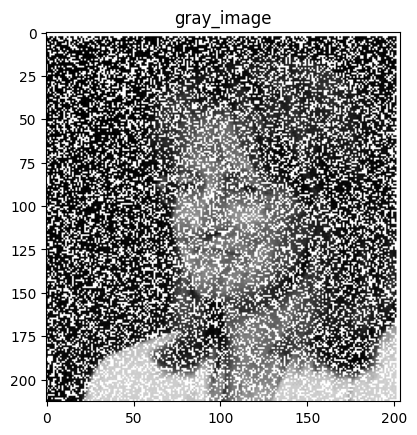

In [34]:
plt.title('gray_image')
plt.imshow(gray_img,cmap='gray')

In [35]:
def fourier_transform(img):
    img_float32 = np.float32(img)

    dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

    return magnitude_spectrum

True

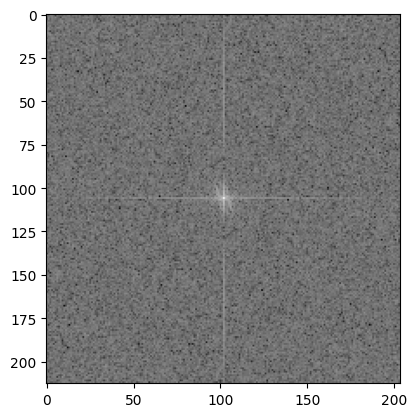

In [36]:
x = fourier_transform(gray_img)
plt.imshow(x,cmap='gray')
cv2.imwrite('converted_fourier.png',x)

In [37]:
def gaussian_filter_smoothing(img):
    img_float32 = np.float32(img)

    dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = img.shape
    crow, ccol = int(rows/2) , int(cols/2)     # center

    # create a mask first, center square is 1, remaining all zeros
    mask = np.zeros((rows, cols, 2), np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 1

    # apply mask and inverse DFT
    fshift = dft_shift*mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    
    return img_back

True

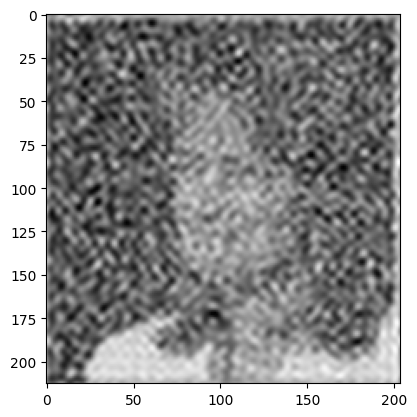

In [38]:
x = gaussian_filter_smoothing(gray_img)
plt.imshow(x,cmap='gray')
cv2.imwrite('gaussian_fourier.png',x)